In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
data_dir = f"{os.environ['MINERVA_HOME']}/data/premade_mil/minimum_10"
df = pd.read_json(f"{data_dir}/val.jsonl", lines=True)


Restructure data so instance text and scores are readily available.

In [6]:
data = []

def temp(row):
    for i in row["instances"]:
        data.append([
            row["bag_id"],
            row["label"],
            i["id_str"],
            i["tweet_text"],
            i["civil_unrest_score"],
            i["instance_score"]
        ])

df.apply(temp, axis="columns")
instance_df = pd.DataFrame(data, columns=["bag_id", "bag_label", "instance_id", "text", "instance_score_old", "instance_score"])


In [8]:
instance_df["country"] = instance_df["bag_id"].map(lambda x: x.split("_")[-1])

# Q1: Distribution of Instance Scores

- Overall
- By positive/negative bag
- By country

<IPython.core.display.Javascript object>


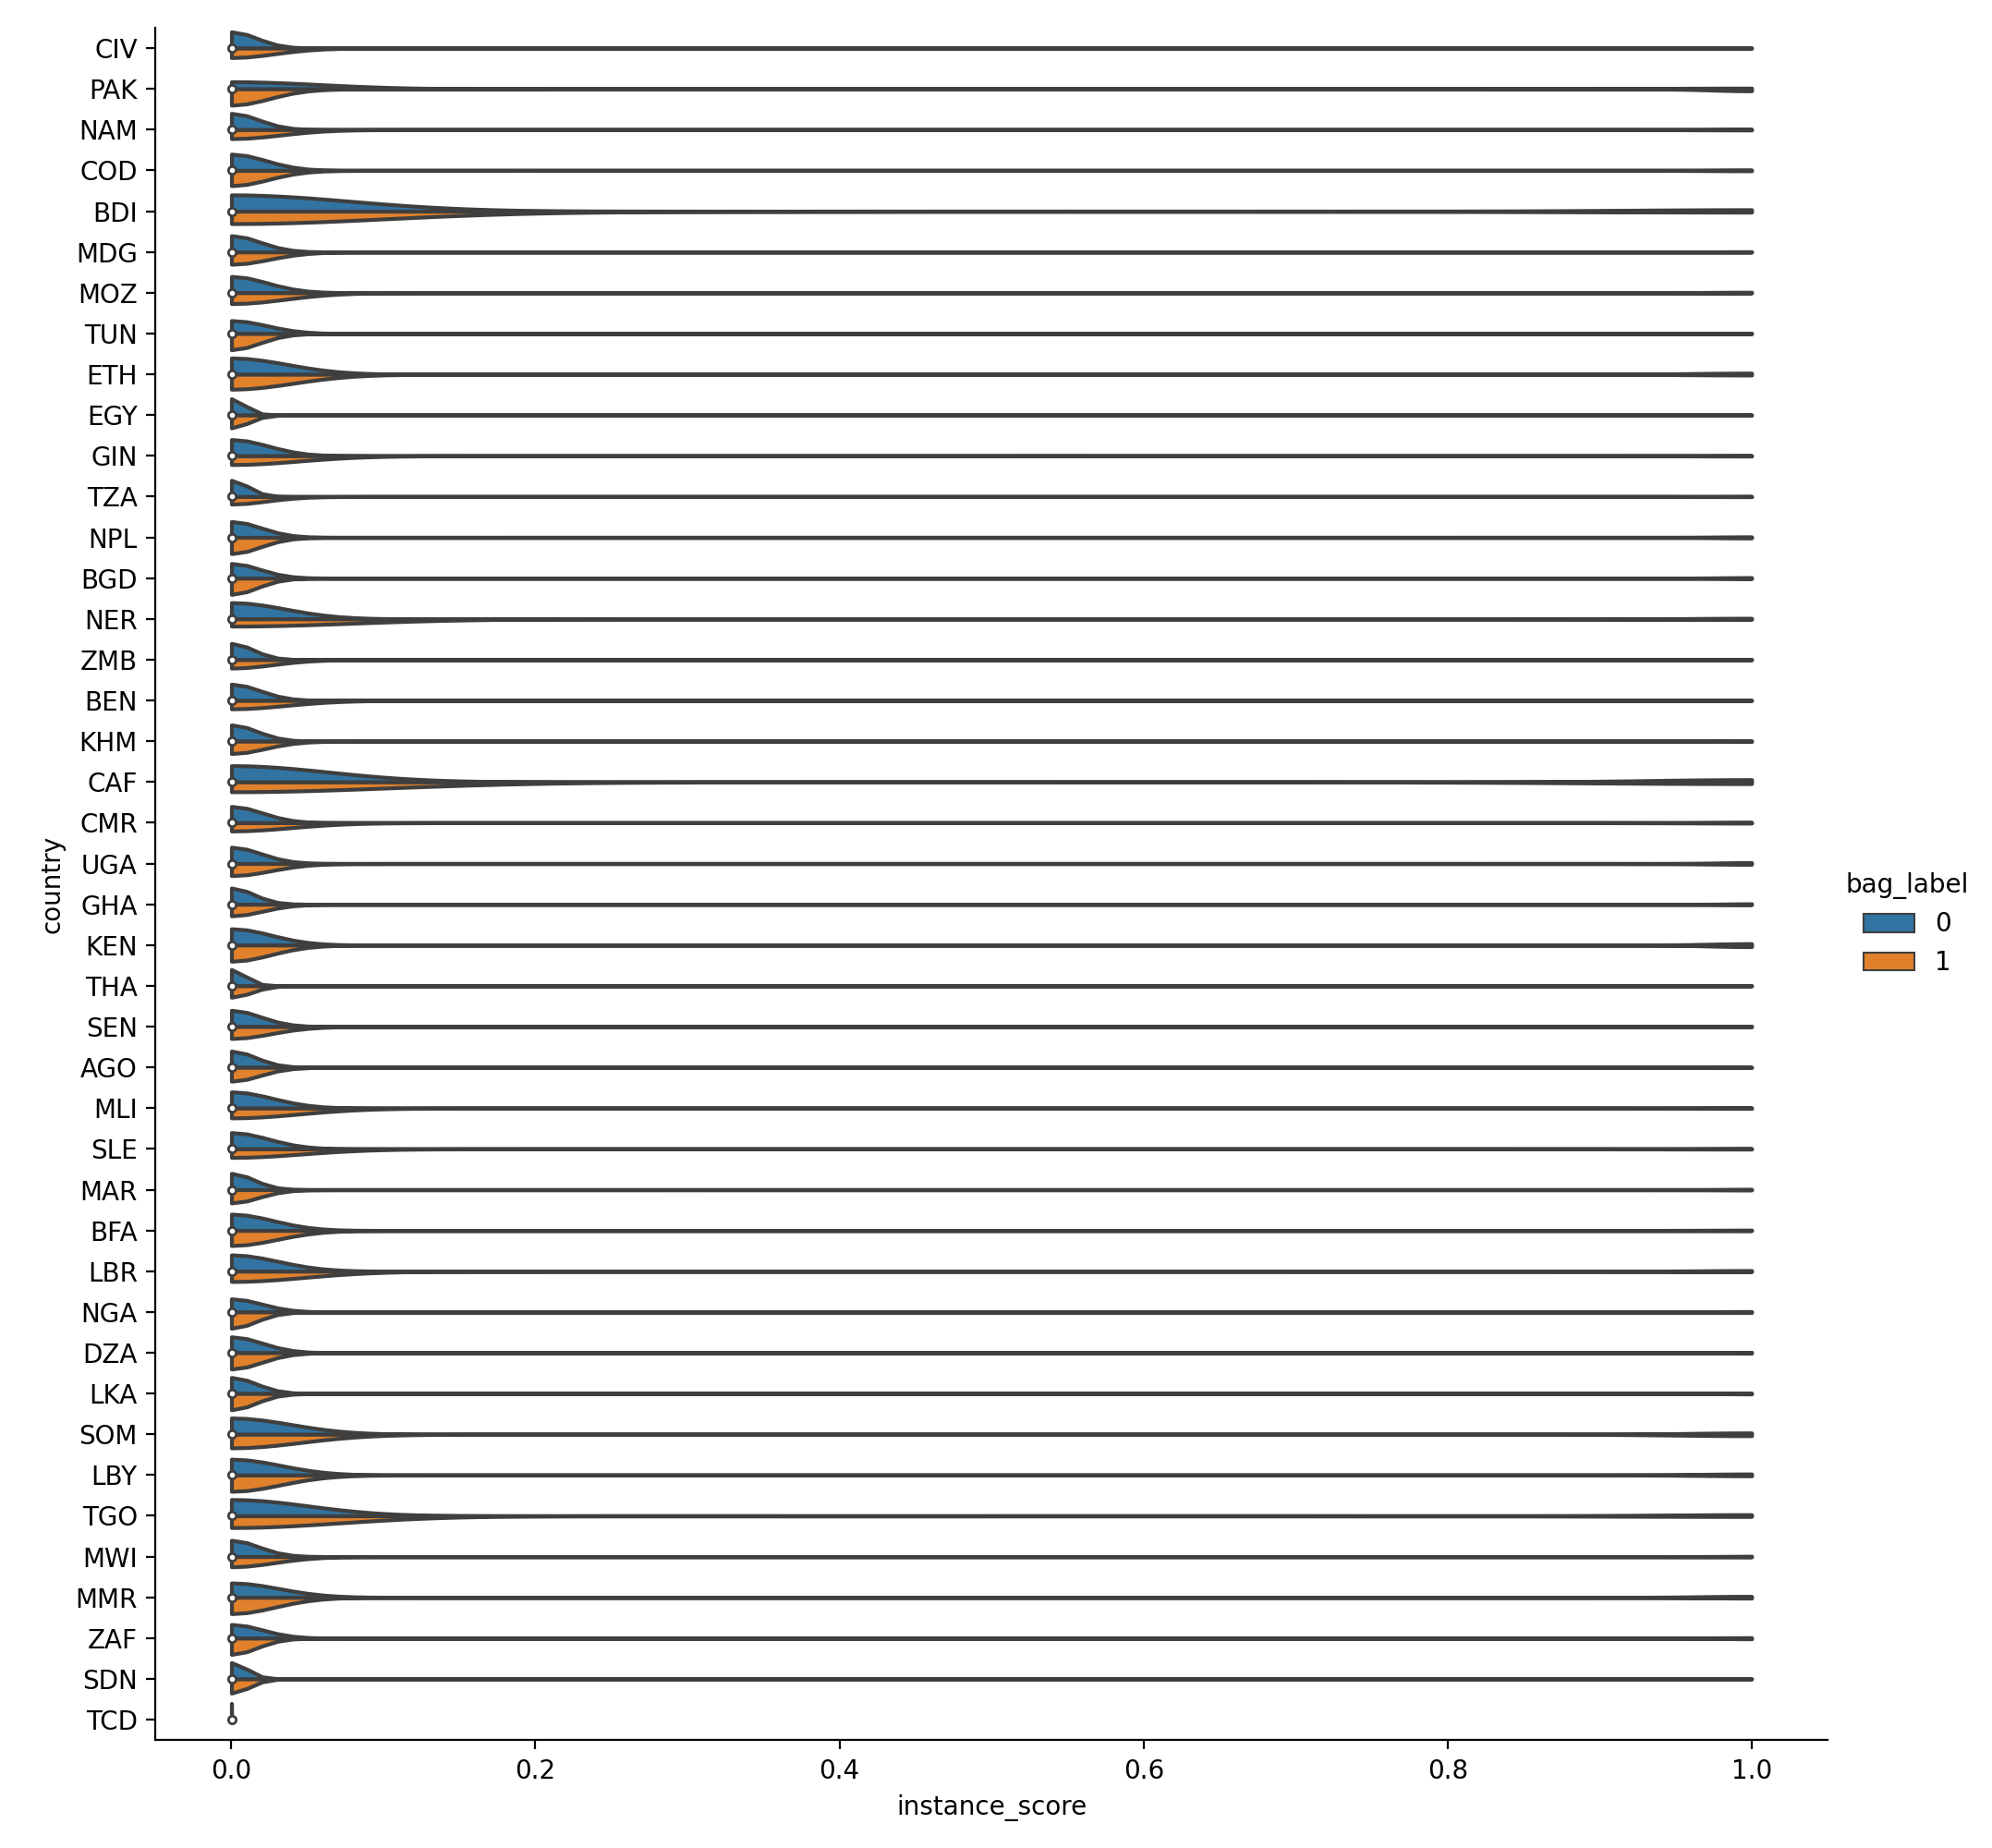

In [19]:
g = sns.catplot(
    instance_df,
    kind="violin",
    split=True,
    cut=0,
    x="instance_score",
    y="country",
    hue="bag_label",
    height=10,
    aspect=1
)

<IPython.core.display.Javascript object>


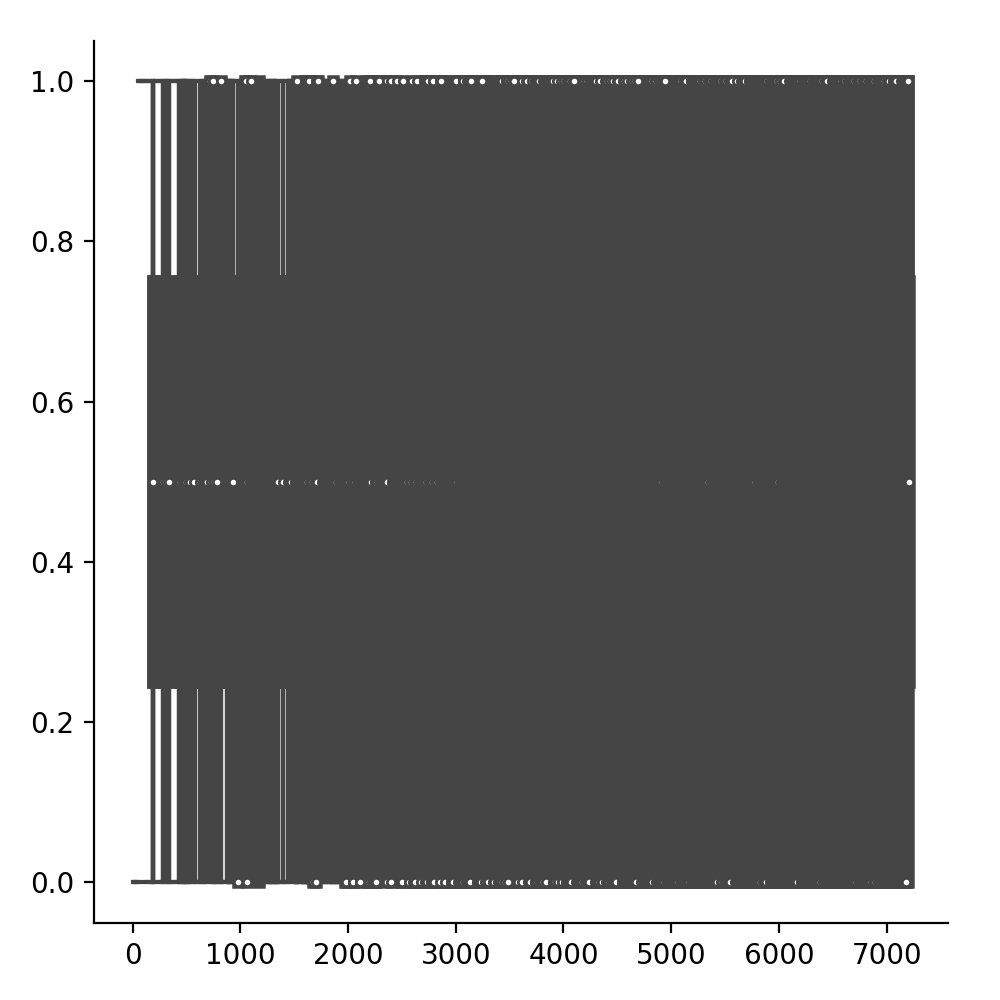

KeyboardInterrupt: 

In [21]:
g2 = sns.catplot(
    instance_df,
    kind="violin",
    split=True,
    cut=0,
    x="instance_score",
    y="bag_label",
    height=5,
    aspect=1
)

# Q3: Qualitative

What do tweets with the highest scores look like? Lowest scores?

In [32]:
instance_df.sort_values(by="instance_score", ascending=False, inplace=True)

high_scorers = instance_df.head(100)
middle_scorers = instance_df[instance_df.instance_score.map(lambda x: 0.4 <= x <= 0.6)].sample(n=100, random_state=42)
low_scorers = instance_df.tail(100)

print(f"Tweets with highest scores")
for row in high_scorers.itertuples():
    text = row.text.replace('\n', ' ')
    print(f"{row.bag_label}\t{row.instance_score:.2}\t{text}")
print("\n\n")
print(f"Tweets with middle scores")
for row in middle_scorers.itertuples():
    text = row.text.replace('\n', ' ')
    print(f"{row.bag_label}\t{row.instance_score:.2}\t{text}")
print("\n\n")
print(f"Tweets with lowest scores")
for row in low_scorers.itertuples():
    text = row.text.replace('\n', ' ')
    print(f"{row.bag_label}\t{row.instance_score:.2}\t{text}")


Tweets with highest scores
0	1.0	@risalrupak I mean countries curtailing free speech. Economic progress is cheerfulness but it must go simultaneously with democratic values.
1	1.0	We don't want to live under black law FCR  We want freedom from tyrant law  We want live together  #ji_wonfatarights https://t.co/JDcuL3xVuR
1	1.0	@M_Farmaajo Mr. president #300livesisnotjustanumber SNA, @amisomsomalia must do offensive rather than staying in the camps. plz order ASAP
1	1.0	@RT_Erdogan @mzubairqa Mr. President now you must start movement for abolition of undemocratic Veto power which is… https://t.co/89QZKRbuyp
0	1.0	"There will be no election should Jubilee forcefully pass #electionlaws against peace loving Kenyan wishes"… https://t.co/gRoeZYbYLC
1	1.0	@truthislouderr @afgexecutive . Afghans need a truth &amp; reconciliation exercise. Killing will not work. Monopoly on power not work either.
1	1.0	What Jubilee caretaker government call full force of the law is completely nonsense. #StopPolic